# **PRACTICA 2**
## **LUIS MANUEL CHAY MARROQUÍN - 202000343**


# **Análisis de archivo TXT**


## **Importación de NLTK e importación de archivos**

In [ ]:
!pip install nltk textblob
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from collections import Counter
from textblob import TextBlob
import matplotlib.pyplot as plt
from google.colab import files
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

plt.rcdefaults()

def cargar_texto():
    uploaded = files.upload()
    for nombre_archivo in uploaded.keys():
        with open(nombre_archivo, 'r', encoding='utf-8') as file:
            return file.read()

texto = cargar_texto()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Saving Coursera Comments.txt to Coursera Comments.txt


## **1. Tokenización**


In [ ]:
# 1. Tokenización
tokens = word_tokenize(texto.lower())

### **Análisis**

El proceso de tokenizaciónn consiste en dividir un texto en partes más pequeñas, llamadas tokens para usarlas en los análisis posteriores que se harán ya que simplifica el análisis ya que analiza palabras y no textos completos

## **2. Eliminación de palabras vacias**

## **3. Lematización y Stemming**


In [ ]:
# 2. Eliminar puntuación y palabras vacías
stop_words = set(stopwords.words('spanish'))
tokens_limpios = [word for word in tokens if word.isalpha() and word not in stop_words]

# 3. Lematización y Stemming
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens_limpios]
stemmed_words = [stemmer.stem(word) for word in tokens_limpios]


### **Análisis**

Primero se hizo el proceso de eliminación de signos de puntuacion y palabras vacias. La eliminación de palabras vacías es el proceso de filtrar y eliminar las palabras comunes y poco significativas en un texto que no aportan valor en el análisis

Posteriormente al haber limpiado las palabras vacias se procedió con la lematización y stemming

La lematización es el proceso de reducir una palabra a su forma base o lema, teniendo en cuenta el contexto y la gramática
Ejemplo:


*   "corriendo" → "correr"
*   "comí" → "comer"


El stemming es una técnica más rudimentaria que reduce una palabra a su raíz, sin preocuparse por si esa raíz es una palabra real en el idioma. Simplemente corta los sufijos o prefijos comunes.


*   "caminando" → "camin"
*   "corriendo" → "corr"

Estas técnicas son fundamentales porque ayudan a limpiar y normalizar el texto, lo que facilita el análisis posterior.

## **4. Frecuencia de palabras**

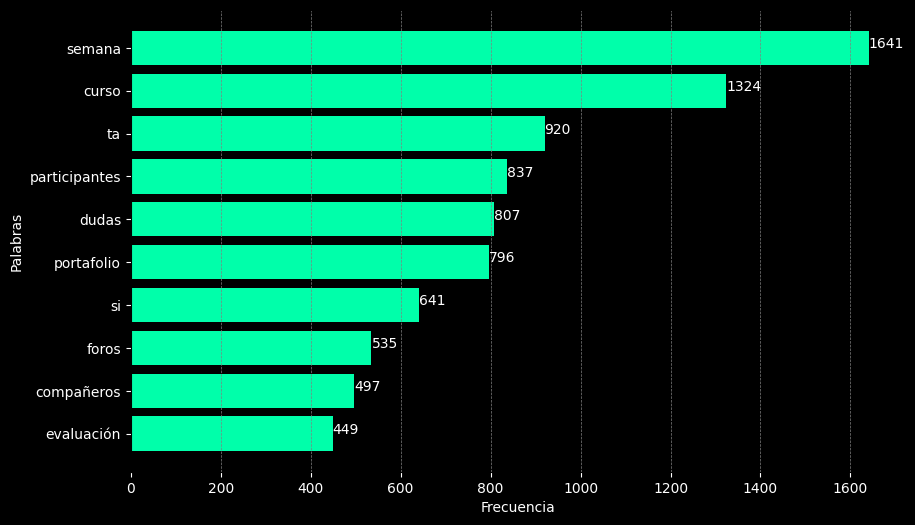

In [ ]:
# 4. Frecuencia de palabras
frecuencia_palabras = Counter(lemmatized_words)

# Graficar de frecuencia
def grafico_frecuencia(frecuencia_palabras, num_palabras=10):
    palabras, frecuencias = zip(*frecuencia_palabras.most_common(num_palabras))
    fig, ax = plt.subplots(figsize=(10,6))
    barras = ax.barh(palabras, frecuencias, color='#00FFAA')
    plt.xlabel('Frecuencia', color='white')
    plt.ylabel('Palabras', color='white')
    plt.gca().invert_yaxis()


    plt.gca().set_facecolor('black')
    plt.gcf().set_facecolor('black')
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')

    # Añadir líneas de cuadrícula para los ejes (gridlines)
    plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)

    for i in range(len(barras)):
        plt.text(barras[i].get_width() + 0.1, barras[i].get_y() + 0.4, str(frecuencias[i]), color='white')

    plt.show()

grafico_frecuencia(frecuencia_palabras)

### **Análisis**

Con la siguiente gráfica podemos notar que la palabra más usada son muy relacionadas a lo que ofrece la pagina "Coursera": cursos, dudas, portafolios, evaluacion, foros entre otras.

Tambien podemos notar como la limpieza de palabras anterior tuvo ciertos fallos ya que no elimino dos palabras vacias: "ta" y "si" y se colaron en este análisis, para un conteo de datos optimo es necesario que no se incluyan estas palabras vacias ya que por su naturaleza ocupan una basta parte del texto pero no nos otorga alguna información relevante



## **5. Análisis de sentimientos**

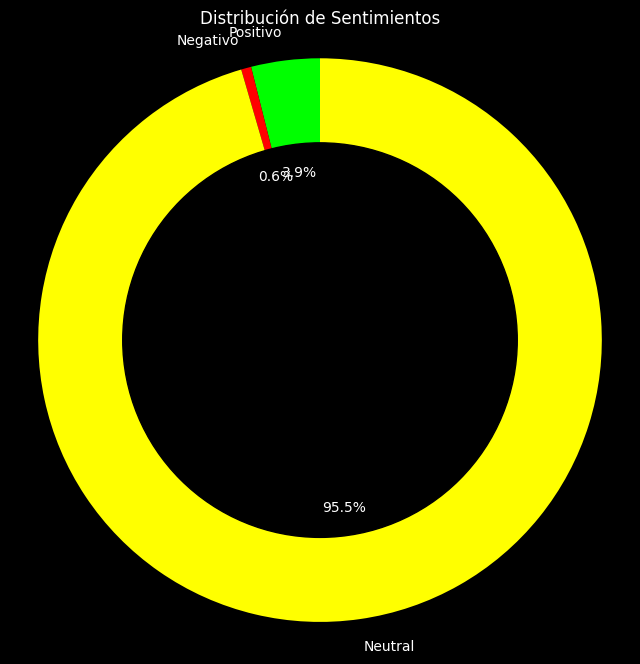



------------------------------------




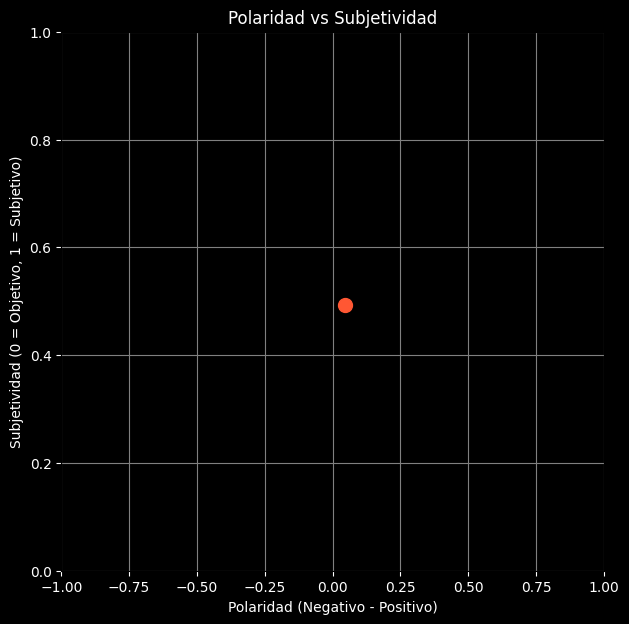

In [ ]:
# 5. Análisis de sentimientos categorizado y subjetividad/objetividad
blob = TextBlob(texto)
sentimiento = blob.sentiment

positivo, negativo, neutral = 0, 0, 0
subjetivo, objetivo = 0, 0

polaridades = []
subjetividades = []

for oracion in blob.sentences:
    polaridad = oracion.sentiment.polarity
    subjetividad = oracion.sentiment.subjectivity

    # Contar los sentimientos
    if polaridad > 0:
        positivo += 1
    elif polaridad < 0:
        negativo += 1
    else:
        neutral += 1

    # Contar subjetividad y objetividad
    if subjetividad >= 0.5:
        subjetivo += 1
    else:
        objetivo += 1

    polaridades.append(polaridad)
    subjetividades.append(subjetividad)

# Gráfico de dona
def grafica_sentimientos(positivo, negativo, neutral):
    etiquetas = ['Positivo', 'Negativo', 'Neutral']
    valores = [positivo, negativo, neutral]
    colores = ['#00FF00', '#FF0000', '#FFFF00']

    fig, ax = plt.subplots(figsize=(8,8))
    wedges, texts, autotexts = ax.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)
    centro_circulo = plt.Circle((0,0), 0.70, color='black', fc='black')
    fig.gca().add_artist(centro_circulo)

    plt.gca().set_facecolor('black')
    plt.gcf().set_facecolor('black')

    plt.title('Distribución de Sentimientos', color='white')
    plt.axis('equal')
    for text in texts:
        text.set_color('white')
    for autotext in autotexts:
        autotext.set_color('white')

    plt.show()

grafica_sentimientos(positivo, negativo, neutral)
print("\n")
print("------------------------------------")
print("\n")

# Gráfico de dispersión (scatter)
def graficar_sentimiento_scatter(sentimiento):
    polaridad = sentimiento.polarity
    subjetividad = sentimiento.subjectivity

    plt.figure(figsize=(7,7))

    plt.scatter(polaridad, subjetividad, color='#FF5733', s=100)
    plt.title("Polaridad vs Subjetividad", color='white')
    plt.xlabel('Polaridad (Negativo - Positivo)', color='white')
    plt.ylabel('Subjetividad (0 = Objetivo, 1 = Subjetivo)', color='white')

    # límites de los ejes
    plt.xlim([-1, 1])
    plt.ylim([0, 1])

    plt.gca().set_facecolor('black')
    plt.gcf().set_facecolor('black')
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')

    plt.grid(True, color='gray')
    plt.show()

graficar_sentimiento_scatter(sentimiento)

### **Análisis**

**Primera Grafica (Distribucion de sentimientos)**

En la primera grafica podemos observar un analisis de las emociones detectadas en las reseñas de la pagina donde en un 95.5% de ellas las personas se mostraban de una manera neutral ante ella, indicandonos que aunque esten satisfechos con el producto no les genera más alla de eso, no nos recomendarian pero tampoco alejarian potenciales nuevos clientes

Mientras que un 3.9% se mostro de una manera positiva ante nosotros, demostrando que superamos sus expectativas como servicio y ellos podrian recomendarnos

Por un ultimo tenemos 0.6% de reseñas con sentimiento negativo, dandonos a entender que nuestros servicios no satisfacieron sus expectativas y no volverian a usar o recomendar la pagina

**Segunda grafica (Polaridad vs Subjetividad)**

En esta grafica hacemos una evaluacion de la subjetividad de las reseñas y su polaridad (o sea si estas fueron positivas negativas) donde para la subjetividad si es un 0 entendemos que es objetivo mientras que más se acerca al 1 es subjetivo. Mientras que la polaridad la evaluamos desde -1 siendo negativo, 0 neutral y entre más cercano a 1 es positivo

Para las reseñas podemos encontrar que la mayoria de ellas se encuentran en un punto medio, donde nos da a entender que son neutras en su mayoria y se inclinan más a ser subjetivas para cada usuario

## **Extracción y reconocimiento de entidades**

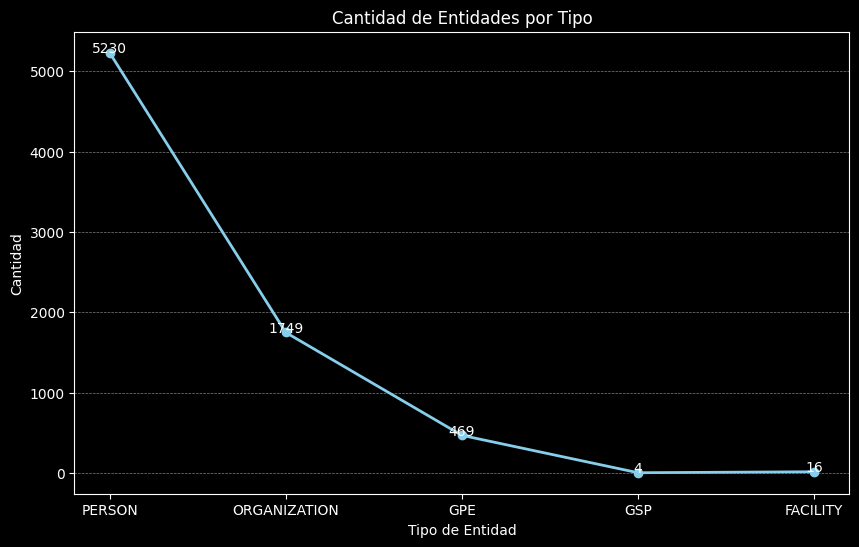



------------------------------------




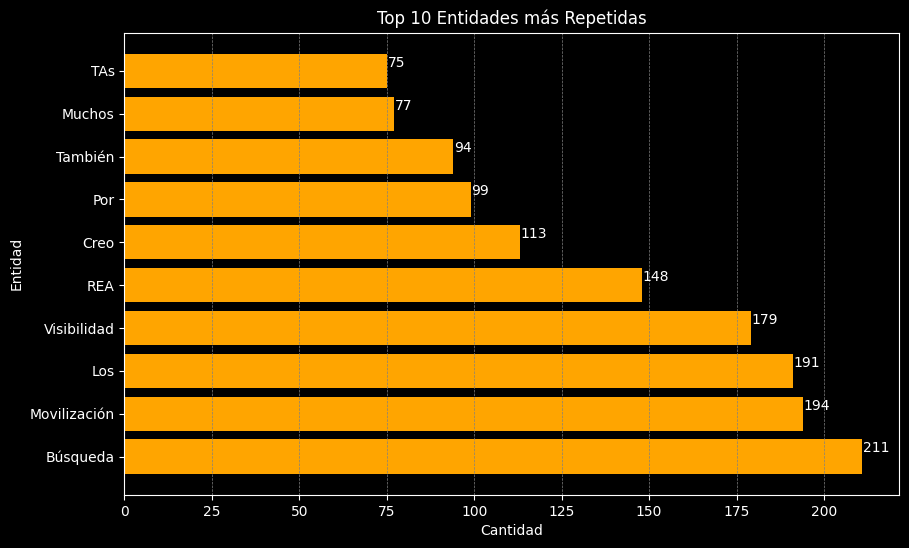

In [ ]:
# Obtener las entidades
entities = nltk.ne_chunk(nltk.pos_tag(word_tokenize(texto)))

entity_counter = Counter()
entidades_encontradas = []

for entity in entities:
    if hasattr(entity, 'label'):
        entity_type = entity.label()
        entity_name = " ".join(c[0] for c in entity)
        entidades_encontradas.append(entity_name)
        entity_counter[entity_type] += 1

top_10_entities = Counter(entidades_encontradas).most_common(10)


plt.style.use('dark_background')

# Gráfico de líneas: cantidad de entidades por tipo
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(list(entity_counter.keys()), list(entity_counter.values()), marker='o', color='skyblue', linestyle='-', linewidth=2)
ax.set_title('Cantidad de Entidades por Tipo', color='white')
ax.set_xlabel('Tipo de Entidad', color='white')
ax.set_ylabel('Cantidad', color='white')
ax.tick_params(colors='white')
for i, value in enumerate(entity_counter.values()):
    ax.text(i, value + 0.2, str(value), color='white', fontsize=10, ha='center')

# Añadir líneas de cuadrícula para los ejes (gridlines)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

plt.show()
print("\n")
print("------------------------------------")
print("\n")


# Gráfico de barras horizontal: top 10 de las entidades más repetidas
top_10_names, top_10_counts = zip(*top_10_entities)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_10_names, top_10_counts, color='orange')
ax.set_title('Top 10 Entidades más Repetidas', color='white')
ax.set_xlabel('Cantidad', color='white')
ax.set_ylabel('Entidad', color='white')
ax.tick_params(colors='white')
for i in ax.patches:
    ax.text(i.get_width() + 0.2, i.get_y() + 0.5, str(int(i.get_width())), color='white', fontsize=10)

# Añadir líneas de cuadrícula para los ejes (gridlines)
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)

plt.show()

### **Análisis**

**Primera Grafica (Cantidad de entidades por tipo)**

En la primera grafica podemos observar la cantidad de entidades más reconocidas en toda la reseña donde el tipo PERSONA es la mpás encontras ya que son reseñas donde se adjunta su nombre, luego el tipo GSP (localizaciones geograficas) es otro mayormente encontrado ya que tenemos la ubicacion de muchos de nuestros usuarios en las reseñas, tambien ORGANIZACION ya que muchas de estas ubicaciones tienen un nombre que se llegan a repetir en las reseñas, aumentando su cantidad de repeticiones

**Segunda grafica (Top 10 entidades mas repetidas)**

En esta grafica podemos ver cuales fueron las entidades más repetidas, donde al parecer muchas de esas palabras no conforman como tal una entidad, por lo que podemos notar que el analisis de entidades esta fallando

# **Analisis archivo CSV**


## **Importacion de pandas y numpy e importación de archivos**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# Definir la función para cargar el archivo CSV
def cargar_csv():
    uploaded = files.upload()
    for nombre_archivo in uploaded.keys():
        return pd.read_csv(nombre_archivo)

df = cargar_csv()

Saving datos.csv to datos.csv


## **Limpieza de datos**

In [ ]:
# Eliminar filas con datos faltantes (NaN) en cualquier columna
df.dropna(inplace=True)

# Limpieza de la columna "Review" para eliminar comas
df['Review'] = df['Review'].replace('[\D]', '', regex=True)
df['Review'] = pd.to_numeric(df['Review'], errors='coerce')  # Convierte a numérico

# Limpiar la columna "Skill gain" y convertir listas representadas como strings en listas reales
df['Skill gain'] = df['Skill gain'].apply(lambda x: eval(x) if pd.notnull(x) and x.startswith("[") else [])

# Limpiar la columna "Modules" y convertir listas representadas como strings en listas reales
df['Modules'] = df['Modules'].apply(lambda x: eval(x) if pd.notnull(x) and x.startswith("[") else [])

# Limpiar la columna "Instructor" y convertir listas representadas como strings en listas reales
df['Instructor'] = df['Instructor'].apply(lambda x: eval(x) if pd.notnull(x) and x.startswith("[") else [])

# Limpiar la columna "Offered By" y convertir listas representadas como strings en listas reales
df['Offered By'] = df['Offered By'].apply(lambda x: eval(x) if pd.notnull(x) and x.startswith("[") else [])

# Convertir la columna 'Rating' a tipo numérico
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Limpiar la columna 'Duration' para extraer el número de horas
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

## **Análisis**

Con este proceso de limpieza nos aseguramos de no tener ningun dato vacio y no manejarlo de ningun modo ya que esos datos afectan grandemente los analisis posteriores por lo que la mejor decisión es ignorar toda esa informacion

Luego limpiamos de una columna el texto innecsario para posteriormente solo guardar el dato numerico que nos interesa, tambien asegurandonos que estamos guardando un dato numerico para que funcione de manera correcta las librerias que lo requieran

Luego para las columnas que cuentan con listas de datos los convertimos a las listas nativas de python para que sean compatibles con los análisis posteriores que las requieren

Y por ultimo nos aseguramos que las columnas numericas se conviertan a un tipo numerico por si no lo esta para mejorar su compatibilidad


## **Promedio de calificaciones para cada curso**




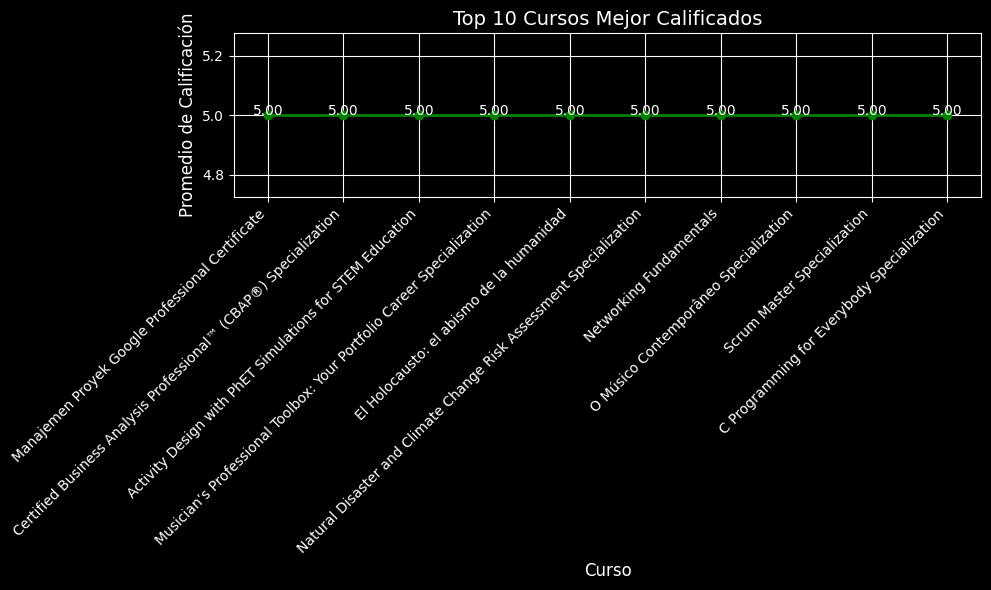



------------------------------------




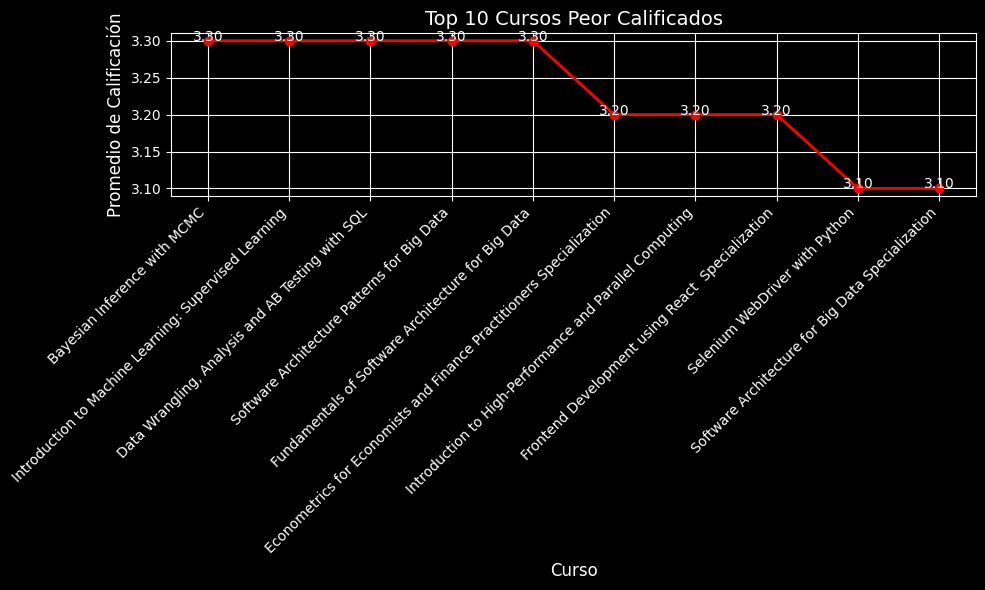


Promedio de calificaciones por curso (ordenado):
Course Title
Manajemen Proyek Google Professional Certificate                         5.0
Certified Business Analysis Professional™ (CBAP®) Specialization         5.0
Activity Design with PhET Simulations for STEM Education                 5.0
Musician’s Professional Toolbox: Your Portfolio Career Specialization    5.0
El Holocausto: el abismo de la humanidad                                 5.0
                                                                        ... 
Econometrics for Economists and Finance Practitioners Specialization     3.2
Introduction to High-Performance and Parallel Computing                  3.2
Frontend Development using React  Specialization                         3.2
Selenium WebDriver with Python                                           3.1
Software Architecture for Big Data Specialization                        3.1
Name: Rating, Length: 2113, dtype: float64


In [ ]:
# Agrupar los datos por 'Course Title' y calcular el promedio de las calificaciones
promedio_calificaciones = df.groupby('Course Title')['Rating'].mean()

promedio_calificaciones_ordenado = promedio_calificaciones.sort_values(ascending=False)
mejores_cursos = promedio_calificaciones_ordenado.head(10)
peores_cursos = promedio_calificaciones_ordenado.tail(10)

# Función para crear gráfico de líneas
def crear_grafico_lineas(cursos, titulo, color):
    plt.figure(figsize=(10, 6))

    plt.plot(cursos.index, cursos.values, marker='o', color=color, linestyle='-', linewidth=2)
    plt.title(titulo, fontsize=14)
    plt.xlabel('Curso', fontsize=12)
    plt.ylabel('Promedio de Calificación', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Mostrar los valores en cada punto
    for i, value in enumerate(cursos):
        plt.text(i, value, f'{value:.2f}', ha='center', fontsize=10)

    # Mostrar la cuadrícula para facilitar la lectura
    plt.grid(True)
    plt.tight_layout()

    plt.show()

# Crear la gráfica de líneas para los 10 mejores cursos calificados
crear_grafico_lineas(mejores_cursos, 'Top 10 Cursos Mejor Calificados', 'green')

promedio_calificaciones_ordenado = promedio_calificaciones.sort_values(ascending=False)


print("\n")
print("------------------------------------")
print("\n")

# Crear la gráfica de líneas para los 10 peores cursos calificados
crear_grafico_lineas(peores_cursos, 'Top 10 Cursos Peor Calificados', 'red')

# Opcional: si quieres ver los resultados ordenados por calificación
promedio_calificaciones_ordenado = promedio_calificaciones.sort_values(ascending=False)

print("\nPromedio de calificaciones por curso (ordenado):")
print(promedio_calificaciones_ordenado)


## **Análisis** -

 En la primera gráfica, todos los cursos del top 10 tienen una calificación perfecta de 5.0, lo que indica una gran satisfacción entre los estudiantes en todos estos cursos

 Mientras que en la segunda gráfica podemos ver como tienden a descender las calificaciones, evidenciando una menor satisfacción en estos cursos

Esto sugiere que los estudiantes pueden estar insatisfechos con ciertos aspectos de estos cursos, particularmente los que tienen calificaciones más bajas.

## **Cursos con mayor y menor rating**

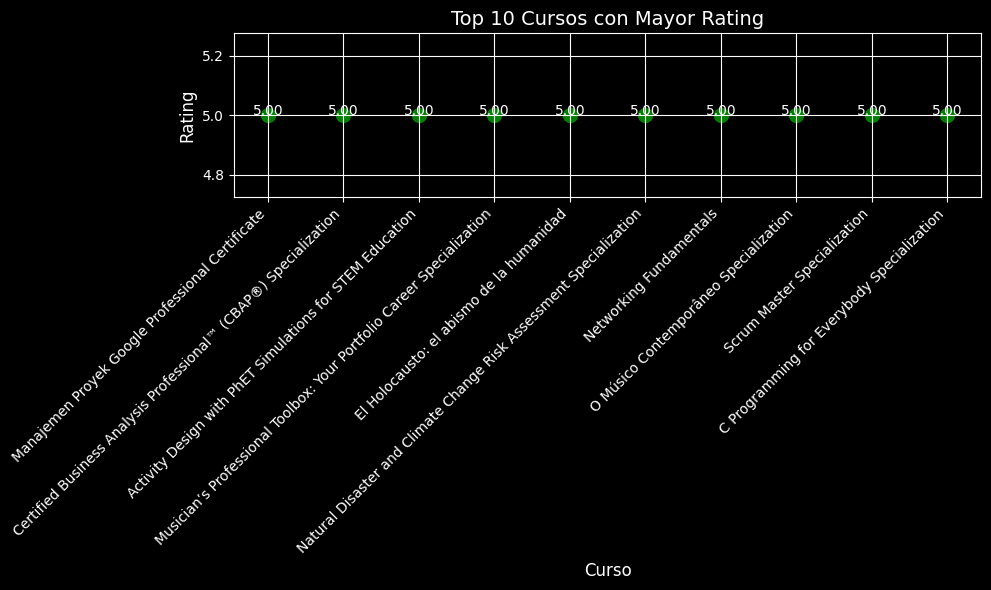



------------------------------------




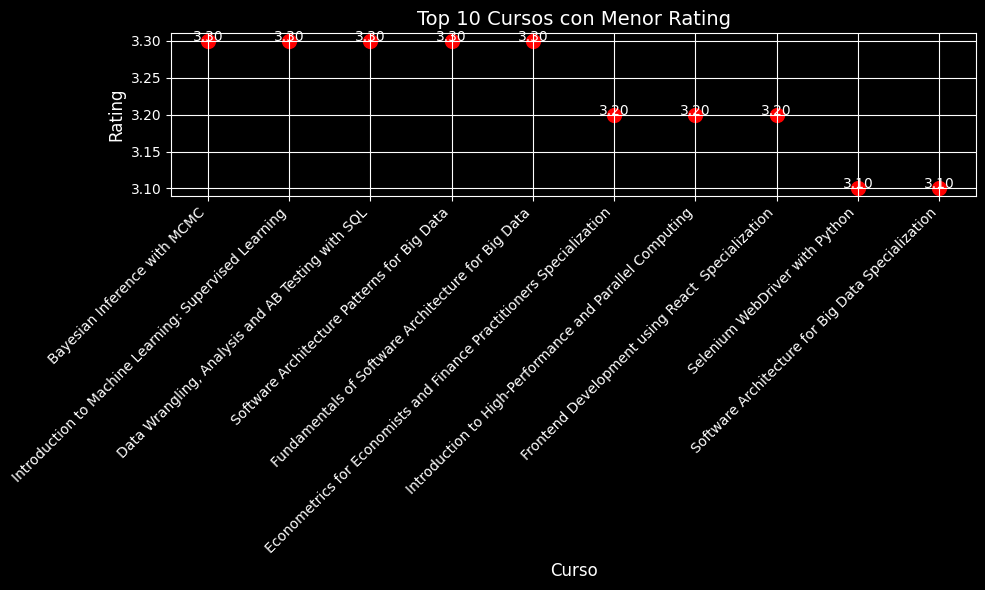


Promedio de calificaciones por curso (ordenado):
Course Title
Manajemen Proyek Google Professional Certificate                         5.0
Certified Business Analysis Professional™ (CBAP®) Specialization         5.0
Activity Design with PhET Simulations for STEM Education                 5.0
Musician’s Professional Toolbox: Your Portfolio Career Specialization    5.0
El Holocausto: el abismo de la humanidad                                 5.0
                                                                        ... 
Econometrics for Economists and Finance Practitioners Specialization     3.2
Introduction to High-Performance and Parallel Computing                  3.2
Frontend Development using React  Specialization                         3.2
Selenium WebDriver with Python                                           3.1
Software Architecture for Big Data Specialization                        3.1
Name: Rating, Length: 2113, dtype: float64


In [ ]:
# Agrupar los datos por 'Course Title' y calcular el promedio de las calificaciones
promedio_calificaciones = df.groupby('Course Title')['Rating'].mean()

promedio_calificaciones_ordenado = promedio_calificaciones.sort_values(ascending=False)
top_10_mayor_rating = promedio_calificaciones_ordenado.head(10)
top_10_menor_rating = promedio_calificaciones_ordenado.tail(10)

# Función para crear gráfico de puntos (scatter plot)
def crear_grafico_puntos(cursos, titulo, color):
    plt.figure(figsize=(10, 6))

    plt.scatter(cursos.index, cursos.values, color=color, s=100, marker='o')
    plt.title(titulo, fontsize=14)
    plt.xlabel('Curso', fontsize=12)
    plt.ylabel('Rating', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Mostrar los valores sobre cada punto
    for i, rating in enumerate(cursos.values):
        plt.text(i, rating, f'{rating:.2f}', ha='center', fontsize=10)

    # Mostrar la cuadrícula
    plt.grid(True)
    plt.tight_layout()

    plt.show()

crear_grafico_puntos(top_10_mayor_rating, 'Top 10 Cursos con Mayor Rating', 'green')

print("\n")
print("------------------------------------")
print("\n")

crear_grafico_puntos(top_10_menor_rating, 'Top 10 Cursos con Menor Rating', 'red')


print("\nPromedio de calificaciones por curso (ordenado):")
print(promedio_calificaciones_ordenado)

## **Análisis**

 En la primera gráfica, observamos como muchos cursos del top de cursos mejor calificados tienen calificacion perfecta, lo que indica una gran satisfacción entre los estudiantes para esos cursos

 Mientras que la segunda gráfica muestra los cursos con peor rating, con calificaciones que oscilan entre 3.30 y 3.10.lo que sugiere que estos cursos probablemente tienen áreas de mejora que los estudiantes han percibido, lo que ha influido en la baja calificación en comparación con los cursos de alto rating.

## **Porcentaje de cursos con horario flexible en relación con el total de cursos**

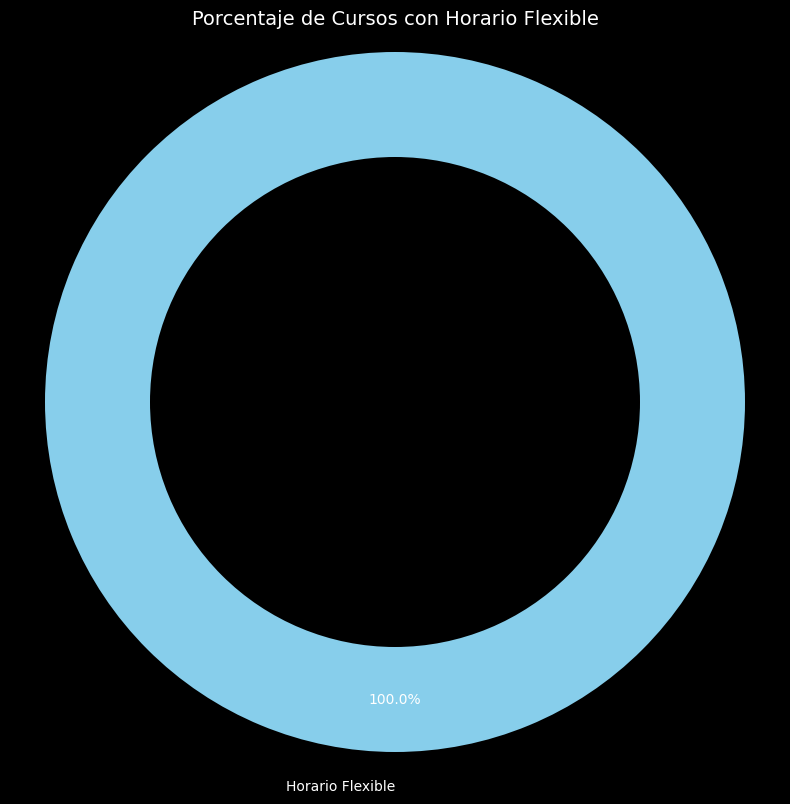

In [ ]:
cursos_horario_flexible = df[df['Schedule'] == 'Flexible schedule']

total_cursos = len(df)
total_cursos_flexibles = len(cursos_horario_flexible)

porcentaje_flexibles = (total_cursos_flexibles / total_cursos) * 100
porcentaje_no_flexibles = 100 - porcentaje_flexibles

# Grafico
labels = ['Horario Flexible']
sizes = [porcentaje_flexibles]
colors = ['skyblue', 'lightgray']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

centre_circle = plt.Circle((0, 0), 0.70, fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Porcentaje de Cursos con Horario Flexible', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


### **Análisis**

De la siguiente grafica vemos que todos los cursos en la plataforma tienen horario flexible, indicando que cada curso se puede hacer en la hora que el usuario desea y las clases que el desea, otorgando ventajas ante distintas maneras tradicionales de aprendizaje que existen actualmente

## **Numero de cursos en cada nivel de dficultad**

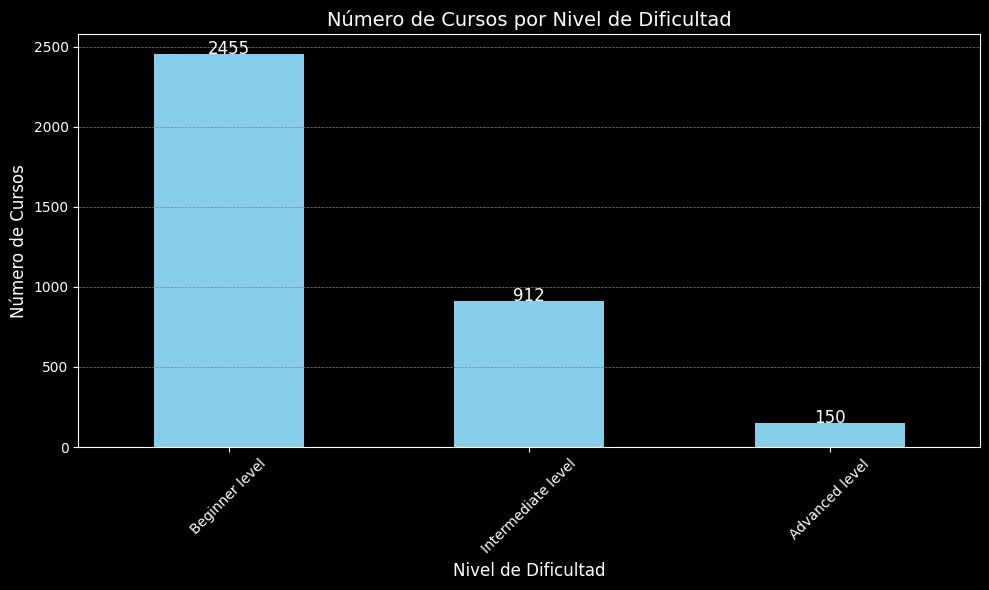

In [ ]:
# Contar el número de cursos
cursos_por_nivel = df['Level'].value_counts()

plt.figure(figsize=(10, 6))
cursos_por_nivel.plot(kind='bar', color='skyblue')

plt.title('Número de Cursos por Nivel de Dificultad', fontsize=14)
plt.xlabel('Nivel de Dificultad', fontsize=12)
plt.ylabel('Número de Cursos', fontsize=12)

for i, value in enumerate(cursos_por_nivel):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=12)

# Añadir líneas de cuadrícula para los ejes (gridlines)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Análisis**

Podemos observar que la mayoria de cursos en la plataforma son para el usuario principiante, otorgando que muchas personas se acerquen a distintos cursos sin importar sus conocimientos previos

Mientras que para el nivel avanzado ya son muy pocos los que se cuentan ya que pueden haber pocas personas interesados tanto en realizar cursos o tomar cursos de esa manera ya que creen que tienen conocimiento que a lo largo de la experiencia lo van adquiriendo y no ven necesario anotarse a un curso, lo cual puede ser cierto o falso

Con el grafico podemos deducir que muchos toman un curso de nivel principiante pero poco a poco lo van dejando, ya puede ser por la calidad del curso o por si ya no es de su agrado el tema

## **Numero de cursos en las principales categorias**

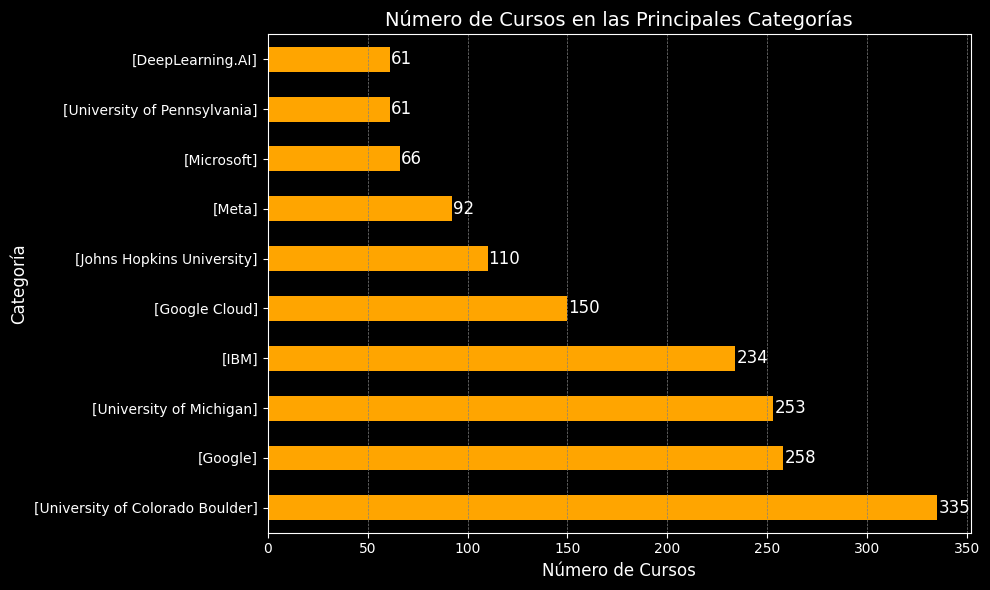

In [ ]:
# Contar el número de cursos por cada categoría (columna 'Offered By' o 'Category')
cursos_por_categoria = df['Offered By'].value_counts()

principales_categorías = cursos_por_categoria.head(10)

plt.figure(figsize=(10, 6))
principales_categorías.plot(kind='barh', color='orange')

plt.title('Número de Cursos en las Principales Categorías', fontsize=14)
plt.xlabel('Número de Cursos', fontsize=12)
plt.ylabel('Categoría', fontsize=12)

# Mostrar los valores al final de las barras
for i, value in enumerate(principales_categorías):
    plt.text(value + 0.5, i, str(value), va='center', fontsize=12)

# Añadir líneas de cuadrícula para los ejes (gridlines)
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


### **Análisis**

De las siguiente grafica podemos notar que muchas empresas de tecnología estan interesadas en crear cursos, para que puedan familiarizarse con sus productos y también puedan aprender y trabajar con ellos obteniendo trabajadores de manera constante

Otros interesados en crear cursos son las universidades o distintas instituciones academicos, siendo un enfoque para hacer beneficiar a sus alumnos o para poder acercar a más interesados a unirse a sus instituciones

## **Relación duración del curso y el número de revisiones**



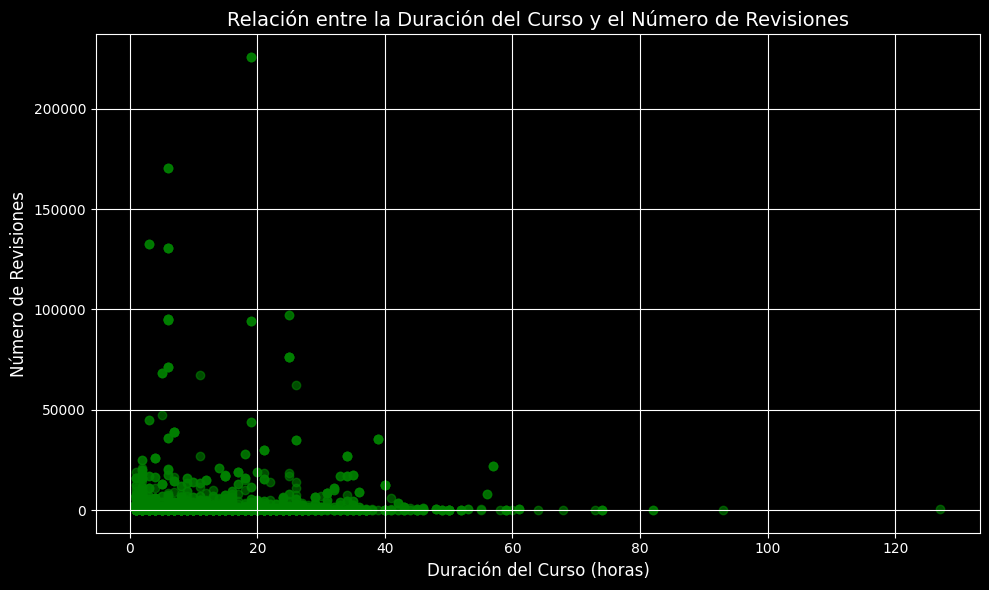

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration'], df['Review'], color='green', alpha=0.6)

# Agregar títulos y etiquetas
plt.title('Relación entre la Duración del Curso y el Número de Revisiones', fontsize=14)
plt.xlabel('Duración del Curso (horas)', fontsize=12)
plt.ylabel('Número de Revisiones', fontsize=12)

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()


### **Análisis**

Podemos observar que los cursos con mayor cantidad de reseñas son los cursos más cortos, esto nos indica que terminan su curso y dejan su reseña del mismo, por lo que sabemos que la retroalimentación  es fundamentada y no se ha hecho de manera inventada

Y mientras más largo sean los cursos menos reseñas tienen ya que no los terminan y no pueden formular una opinión objetiva

## **Distribucion de duraciones de los cursos**

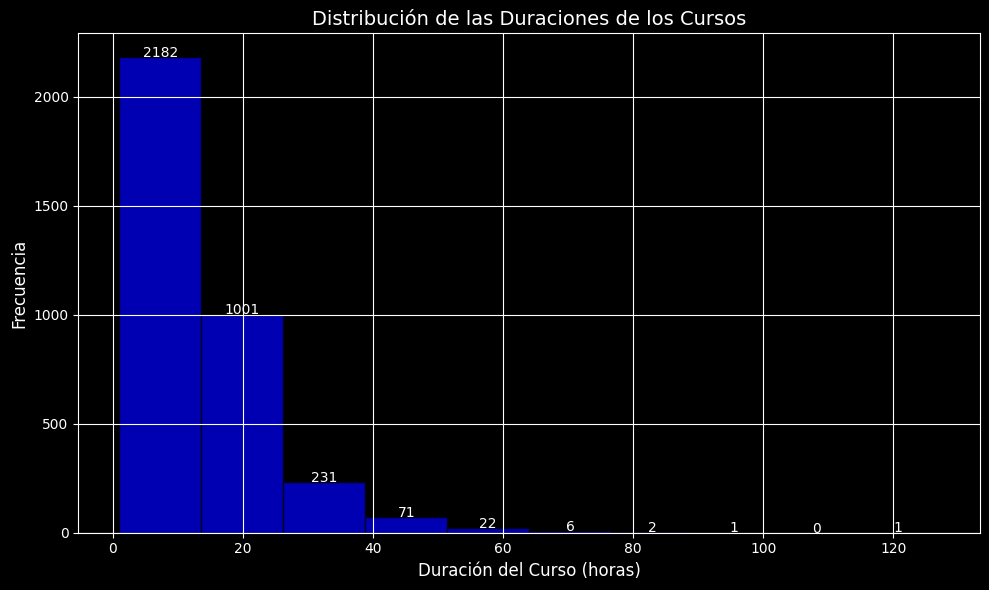

In [ ]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['Duration'], bins=10, color='blue', edgecolor='black', alpha=0.7)

plt.title('Distribución de las Duraciones de los Cursos', fontsize=14)
plt.xlabel('Duración del Curso (horas)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar los valores sobre cada barra
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, n[i] + 0.5, str(int(n[i])),
             ha='center', fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()

### **Análisis**

De la siguiente grafica podemos observar como la mayoria de cursos estan entre las 0 a 20 horas siendo cursos de poca duración beneficiando tanto a los estudiantes como a los que que imparten los cursos ya que es contenido más fácil de producir/ consumir y desde ese rango van disminuyendo poco a poco los cursos largos mientras que tambieén podemos ver que existe un curso de una duración muy larga siendo 120 horas

## **Distribucion de calificaciones de los cursos por nivel de dificultad**

<Figure size 1000x600 with 0 Axes>

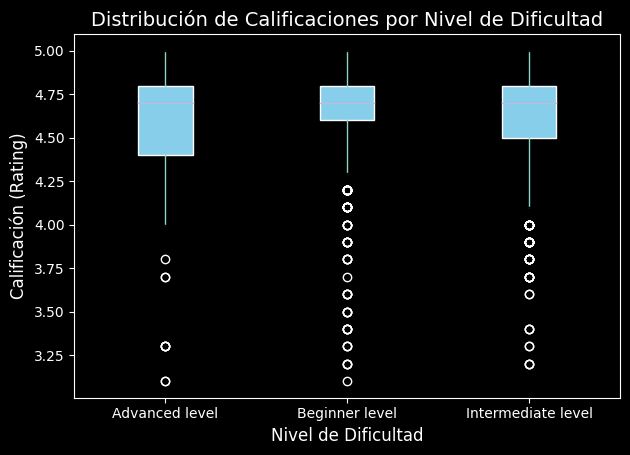

In [ ]:
# Crear el gráfico de cajas para visualizar la distribución de las calificaciones por nivel de dificultad
plt.figure(figsize=(10, 6))
df.boxplot(column='Rating', by='Level', grid=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))

plt.title('Distribución de Calificaciones por Nivel de Dificultad', fontsize=14)
plt.suptitle('')  # Quita el título automático del 'by'
plt.xlabel('Nivel de Dificultad', fontsize=12)
plt.ylabel('Calificación (Rating)', fontsize=12)

plt.tight_layout()
plt.show()

### **Análisis**

Del siguiente grafico podemos apreciar que las calificaciones se concentran entre 4.5 y 5.0 para todos los niveles, lo que indica que los cursos, independientemente de su dificultad, tienden a recibir buenas calificaciones

También los cursos de nivel avanzado presentan una mayor dispersión en sus calificaciones, con algunos valores debajo de 4.0, lo que indica una mayor variabilidad en la percepción de calidad por parte de los estudiantes a lo que ellos estaban esperando, esto puede ser debido a que se considere como avanzado pero es conocimiento que no es tan avanzado

# **Conclusiones finales**

## **Conclusiones para la página Coursera**

Tras un análisis exhaustivo a distintas partes y estadisiticas de Coursera podemos concluir que la página provee de servicios de calidad a todos sus usuarios reflejandose en la cantidad de interesados de adquirir un producto de la página o crear contenido para ella

Podemos notar la satisfacción de los usuarios tanto en sus reseñas, mostrando neutralidad la mayoría de veces, como en las estadisitcas de cada curso, donde los cursos llegan a ser reseñados y completados de manera exitosa

Recomendamos a Coursera que siga con su modelo de cursos flexible ya que ha sido un gran acierto, también a que siga aceptando contenido de calidad de instituciones academicas certificadas y por ultimo dejar de lado su modelo de etiquetas Avanzado, intermedio y principiante ya que ha demostrado no tener los aciertos esperados, generando confusión para los usuarios ya que por la etiqueta que tiene no tienen el contenido esperado

## **Uso de Python para análisis de datos**

Tras usar distintas herramientas de análisis de datos de python puedo concluir lo siguiente

* La libreria `matplotlib` otorga gráficos de alta calidad para mostrar en distintas aplicaciones y cuentan con una gran personalización, recomiendo el uso de esta libreria para trabajos profesionales

* La libreria `numpy` junto a `pandas` otorga un analísis de datos de una gran calidad, de alta velocidad y siendo todo esto de una manera realmente sencilla, ya que muchas de sus funciones nativas beneficia al analista de datos en su sencillez de aprendizaje y uso, recomiendo grandemente el uso de estas lberias para análisis de datos

* Por otro lado, la lbreria `NLKT` mostró algunos resultados no satisfactorios a mi parecer, teniendo un acierto del 70% en el mejor de los casos, muchos de sus análisis fueron certeros a lo que se esperaba pero su limitación de solo trabajar con el idioma ingles no mostró un rendimiento aceptable, se podría solucionar traduciendo el texto a ingles y trabajar con ello y volverlo a traducir de vuelta pero todo ese proceso es tedioso y vuelve lento y poco optimo el problema, se pudieron haber obtenido mejores resultados si el texto analizado estuviera en ingles pero al no ser el caso las restricciones de idioma afecta de gran manera los resultados finales